# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [8]:
import pandas as pd

In [9]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [10]:
#1
facts['Density'] = facts['Pop_2020']/facts['Area_land']
facts['Density'].nlargest(5)
facts.sort_values(by='Density', ascending=False).head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4364.208861
32,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,282090,Jersey City,265549.0,Paterson,145627.0,Elizabeth,128885.0,Edison,100008.0,487.688035
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,179883,Cranston,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,409.775579
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,395326,Bayamón,170480.0,Carolina,147661.0,Ponce,133191.0,Caguas,124434.0,370.531574
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,692600,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,347.981239


In [11]:
#2
facts['More_Water'] = facts['Area_water']> facts['Area_land'] # boolean true or false

waterGreater = facts[facts['More_Water'] == True]
waterGreater
# facts.sort_values(by='More_Water', ascending=False).head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,More_Water
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818,True
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129,True
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051,True
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,305.272989,True


In [12]:
#3 Which entities increased in population the most in the last 10 years?
facts['Greater_Pop20'] = facts['Pop_2020'] > facts['Pop_2010']
greaterPop20 = facts[facts['Greater_Pop20'] == True]
greaterPop20.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,More_Water,Greater_Pop20
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0,38.303276,False,True
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,0.496221,False,True
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,24.307722,False,True
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,22.345490,False,True
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,97.996419,False,True


In [13]:
#4 What state bird accounts for the largest population as of 2020? Land area?
facts.groupby(by='State_bird').sum().sort_values(by= 'Pop_2020', ascending= False).head(1)

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Density,More_Water,Greater_Pop20
State_bird,,,,,,,,,,,,,,,,
Northern mockingbird,1238297,1178574,59722,63567335.0,56176191,3463383.0,3573810.6,2202168,4262215,2818895.0,2087169.0,1575653.0,1454625.0,309.575693,0,4


In [14]:
#4 Land area?
facts.groupby(by='State_bird').sum().sort_values(by= 'Area_land', ascending= False).head(1)

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Density,More_Water,Greater_Pop20
State_bird,,,,,,,,,,,,,,,,
Willow ptarmigan,1723337,1477953,245384,733391.0,710231,50246.7,54385.6,32113,291538,32113.0,31516.0,10529.0,8647.0,0.496221,0,1


In [15]:
#5 How many entities' largest city is their capital city?
facts['BigCity_Capital'] =facts['city_1_pop'] == facts['Capital_pop']
len(facts[facts['city_1_pop'] == facts['Capital_pop']])


21

In [16]:
#6 Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

facts['Largest_percent'] = 100*(facts['city_1_pop'] - facts['city_5_pop'])/(facts['city_1_pop'])
facts.sort_values(by= 'Largest_percent', ascending= False).head(1)

#sort_values(by= 'City_1', ascending = False).head()
#facts.sort_values(by= 'City_1', ascending = False).head(1)


,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,More_Water,Greater_Pop20,BigCity_Capital,Largest_percent
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,206284.0,Yonkers,199663.0,Syracuse,142749.0,165.506681,False,True,False,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [17]:
# Sample code to help with the plots

import matplotlib as plt
%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [18]:
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates.head(5)

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [19]:
dates['Date_Fixed'] = pd.to_datetime(dates['Date'],errors='raise')
dates[['Name','Date','Date_Fixed', 'Status']].head()

,Name,Date,Date_Fixed,Status
0,Alabama,"December 14, 1819",1819-12-14,State
1,Alaska,"January 3, 1959",1959-01-03,State
2,American Samoa,"April 17, 1900",1900-04-17,Territory
3,Arizona,"February 14, 1912",1912-02-14,State
4,Arkansas,"June 15, 1836",1836-06-15,State


In [20]:
facts['State'] = dates['Name']
merged = pd.merge(facts,dates, left_on="State", right_on="Name", how = 'outer')
merged.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,Density,More_Water,Greater_Pop20,BigCity_Capital,Largest_percent,Name,Date,Status,Abbreviation,Date_Fixed
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,38.303276,False,True,False,51.603902,Alabama,"December 14, 1819",State,AL,1819-12-14
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,0.496221,False,True,False,97.034006,Alaska,"January 3, 1959",State,AK,1959-01-03
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,249.681818,True,False,False,69.162996,American Samoa,"April 17, 1900",Territory,AS,1900-04-17
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,24.307722,False,True,True,84.811944,Arizona,"February 14, 1912",State,AZ,1912-02-14
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,22.345490,False,True,True,60.980579,Arkansas,"June 15, 1836",State,AR,1836-06-15


In [21]:
#7 Of the states that joined the United States before 1790, what is the most common state flower?
merged[merged['Date_Fixed']<'1790-01-01']
merged[merged['Date_Fixed']<'1790-01-01'].groupby(by='State_flower').sum()
merged[merged['Date_Fixed']<'1790-01-01'].value_counts('State_flower')

#facts.groupby(by='State_bird').sum().sort_values(by= 'Pop_2020', ascending= False).head()
#head()
#states['Date']<pd.datetime(1790,1,1)

State_flower
Mountain laurel      2
American dogwood     1
Black-eyed susan     1
Cherokee rose        1
Flowering dogwood    1
Mayflower            1
Peach blossom        1
Purple lilac         1
Rose                 1
Violet               1
Yellow jessamine     1
dtype: int64

In [22]:
#8 Which has the larger population density, the most dense US Territory or the least dense state?

#dates[dates['Status']=='State']
DenseTerr = merged[merged['Status'] == 'Territory']
DenseTerr

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,Density,More_Water,Greater_Pop20,BigCity_Capital,Largest_percent,Name,Date,Status,Abbreviation,Date_Fixed
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,249.681818,True,False,False,69.162996,American Samoa,"April 17, 1900",Territory,AS,1900-04-17
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,0.310129,True,False,False,80.252765,Guam,"April 11, 1899",Territory,GU,1899-04-11
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,0.108051,True,False,True,NaN,Northern Mariana Islands,"November 4, 1986",Territory,MP,1986-11-04
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,370.531574,False,False,True,68.523699,Puerto Rico,"April 11, 1899",Territory,PR,1899-04-11
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,305.272989,True,False,True,82.268276,United States Virgin Islands,"March 31, 1917",Territory,VI,1917-03-31


In [23]:
DenseTerr.sort_values(by= 'Density', ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,Density,More_Water,Greater_Pop20,BigCity_Capital,Largest_percent,Name,Date,Status,Abbreviation,Date_Fixed
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,370.531574,False,False,True,68.523699,Puerto Rico,"April 11, 1899",Territory,PR,1899-04-11


In [24]:
LeastDenseSt = merged[merged['Status'] == 'State']
LeastDenseSt.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,Density,More_Water,Greater_Pop20,BigCity_Capital,Largest_percent,Name,Date,Status,Abbreviation,Date_Fixed
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,38.303276,False,True,False,51.603902,Alabama,"December 14, 1819",State,AL,1819-12-14
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,0.496221,False,True,False,97.034006,Alaska,"January 3, 1959",State,AK,1959-01-03
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,24.307722,False,True,True,84.811944,Arizona,"February 14, 1912",State,AZ,1912-02-14
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,22.345490,False,True,True,60.980579,Arkansas,"June 15, 1836",State,AR,1836-06-15
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,97.996419,False,True,False,86.740992,California,"September 9, 1850",State,CA,1850-09-09


In [25]:
LeastDenseSt.sort_values(by= 'Density', ascending= True).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,Density,More_Water,Greater_Pop20,BigCity_Capital,Largest_percent,Name,Date,Status,Abbreviation,Date_Fixed
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,0.496221,False,True,False,97.034006,Alaska,"January 3, 1959",State,AK,1959-01-03


In [26]:
print ('The Answer Is Puerto Rico')

The Answer Is Puerto Rico


In [27]:
#9 Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
import matplotlib as plt
%config InlineBackend.figure_format ='retina'

<AxesSubplot:xlabel='Name'>

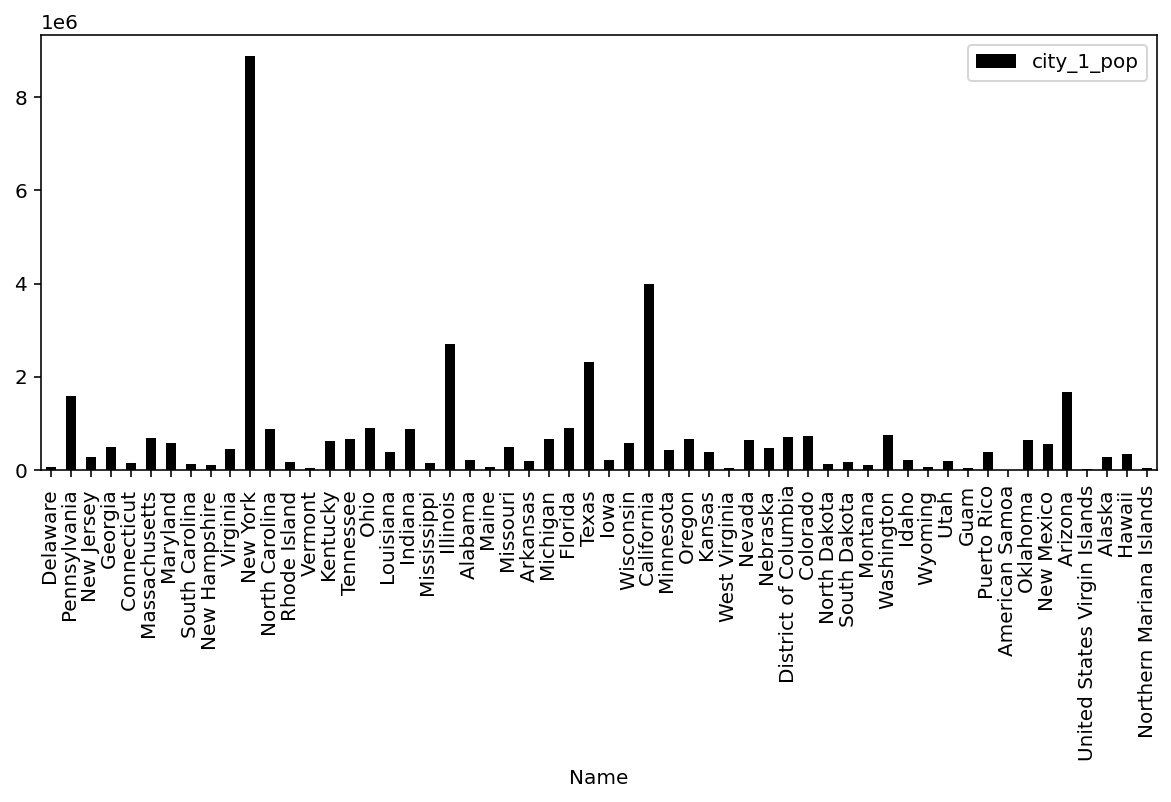

In [38]:
merged.sort_values(by= 'Date_Fixed', ascending = True).plot(x='Name', y='city_1_pop', kind='bar', color = 'black', figsize=(10,4))

In [36]:
#Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

<AxesSubplot:xlabel='Name'>

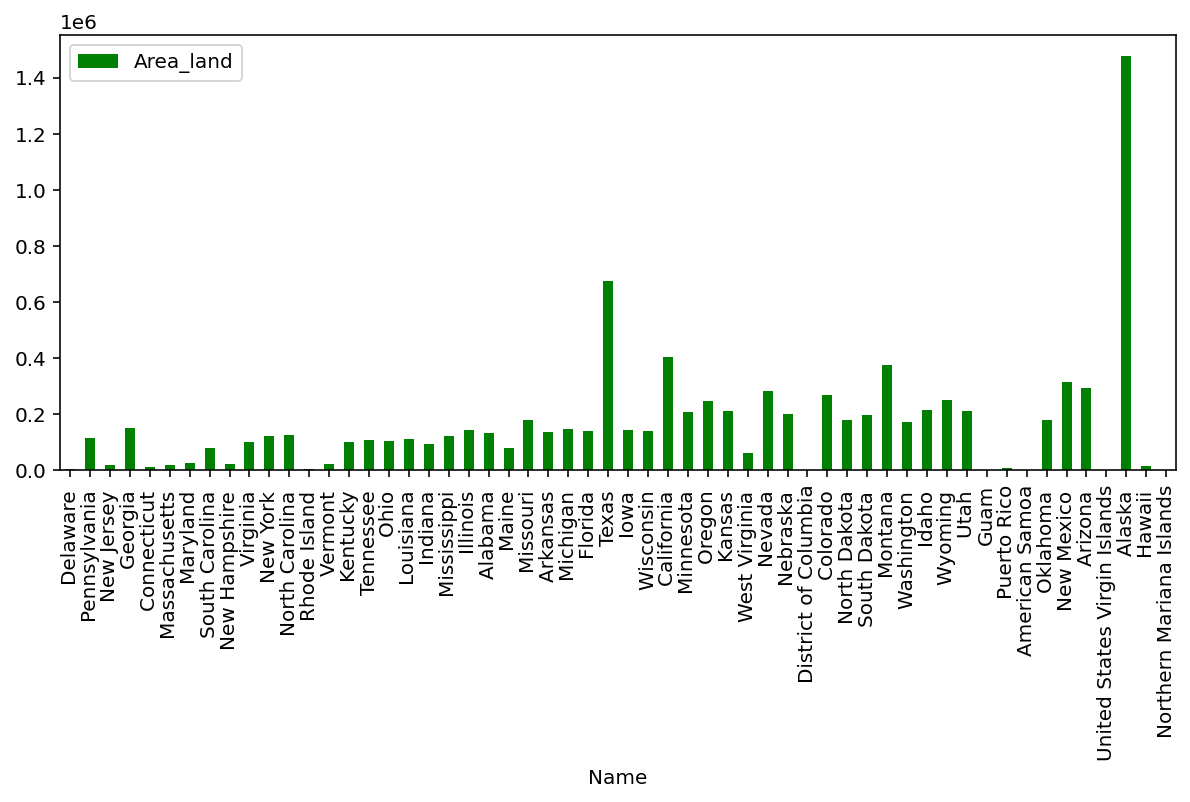

In [40]:
merged.sort_values(by= 'Date_Fixed', ascending = True).plot(x='Name', y='Area_land', kind='bar', color = 'green', figsize=(10,4))

<AxesSubplot:xlabel='Name'>

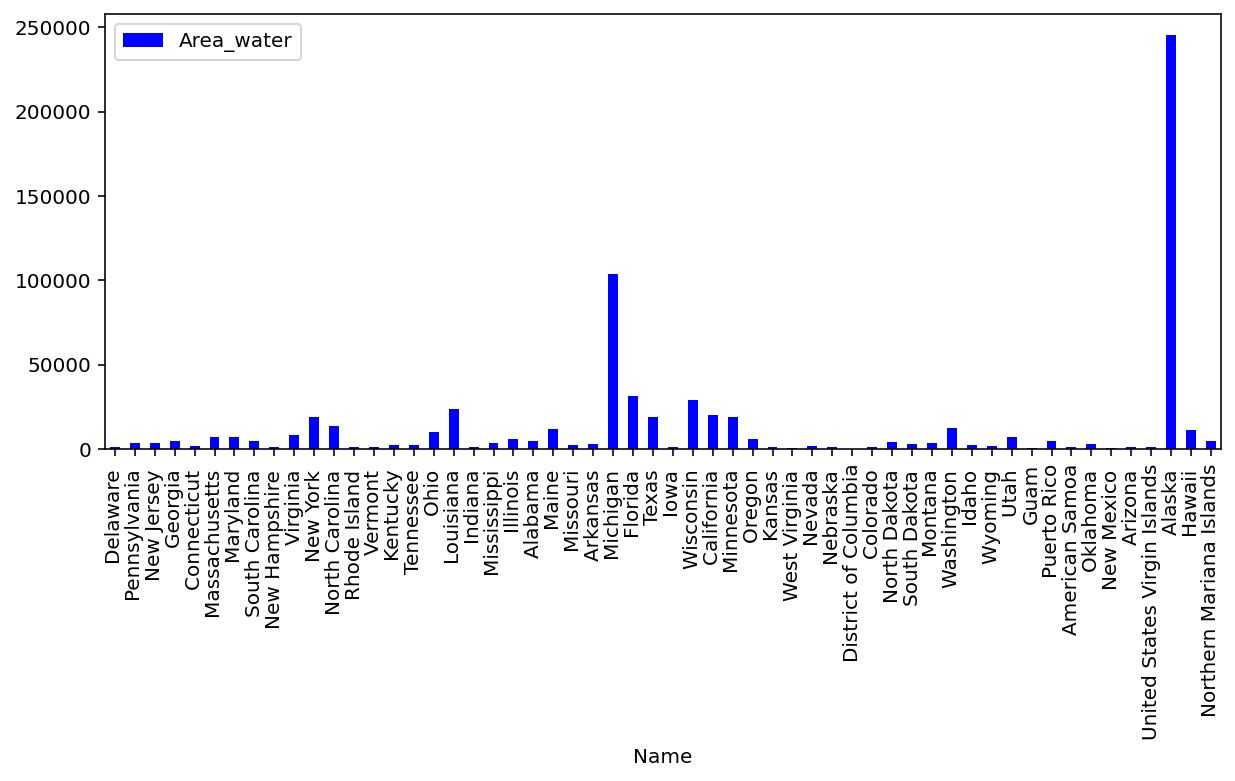

In [41]:
merged.sort_values(by= 'Date_Fixed', ascending = True).plot(x='Name', y='Area_water', kind='bar', color = 'blue', figsize=(10,4))